In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# --------- 1) Read the file, skip metadata lines -----------
# We skip the first 4 lines because:
#   Line 1: %OpenBCI Raw EXG Data
#   Line 2: %Number of channels = 8
#   Line 3: %Sample Rate = ...
#   Line 4: %Board = ...
# Then line 5 has the column headers (Sample Index, EXG Channel 0, ... )
#
# If your file structure changes, adjust skiprows accordingly.
#
df = pd.read_csv(
    "SRP+Ground.csv",
    sep='\t',
    skiprows=4 # Might need to adjust if your text file is slightly different
)
print(df.head())
print(df.columns)
# --------- 2) Inspect and rename columns -----------
# By default, pandas will read the line 5 in your file as column names.
# If you prefer your own shorter column names, you can do so here:
df.columns = [
    "Sample Index", 
    "EXG0", "EXG1", "EXG2", "EXG3", "EXG4", "EXG5", "EXG6", "EXG7", 
    "AccelX", "AccelY", "AccelZ", 
    "Not Used", 
    "D11", "D12", "D13", "D17", 
    "Not Used2", 
    "D18", 
    "Analog0", "Analog1", "Analog2", 
    "Timestamp_raw", 
    "Marker", 
    "Timestamp_formatted"
]

# --------- 3) Parse timestamp if you want actual time in seconds -----------
# The "Timestamp_formatted" looks like "2025-01-08 18:10:59.439"
# Convert it to a datetime, and then create an 'elapsed' time
df["Datetime"] = pd.to_datetime(df["Timestamp_formatted"])
t0 = df["Datetime"].iloc[0]  # first timestamp
df["Time_s"] = (df["Datetime"] - t0).dt.total_seconds()

# --------- 4) Plot each EXG channel in a separate subplot -----------
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(10, 16), sharex=True)

for i in range(8):
    channel_name = f"EXG{i}"
    axs[i].plot(df["Time_s"], df[channel_name], label=channel_name)
    axs[i].set_ylabel(channel_name)
    axs[i].legend(loc="upper right")

axs[-1].set_xlabel("Time (s) relative to start")

plt.suptitle("OpenBCI EXG Channels Over Time", fontsize=14)
plt.tight_layout()
plt.show()


   4.000000  -12149.894196  -16670.981547  -10650.025088  -17957.749123  \
0       5.0  -12015.649619  -16530.590240  -10516.339304  -17822.051683   
1       6.0  -11883.439050  -16390.288340  -10387.794422  -17683.224998   
2       7.0  -12017.482462  -16530.836109  -10524.251822  -17816.419043   
3       8.0  -12163.148780  -16682.313881  -10664.844294  -17965.348716   
4       9.0  -12053.468770  -16570.599862  -10555.588967  -17863.335355   

   -187500.022352  -187500.022352.1  187500.000000  -187500.022352.2  \
0  -187500.022352    -187500.022352       187500.0    -187500.022352   
1  -187500.022352    -187500.022352       187500.0    -187500.022352   
2  -187500.022352    -187500.022352       187500.0    -187500.022352   
3  -187500.022352    -187500.022352       187500.0    -187500.022352   
4  -187500.022352    -187500.022352       187500.0    -187500.022352   

   0.068000  ...  0.000000.1  0.000000.2  0.000000.3  0.000000.4  0.000000.5  \
0     0.068  ...         0.0        

ValueError: Length mismatch: Expected axis has 24 elements, new values have 25 elements

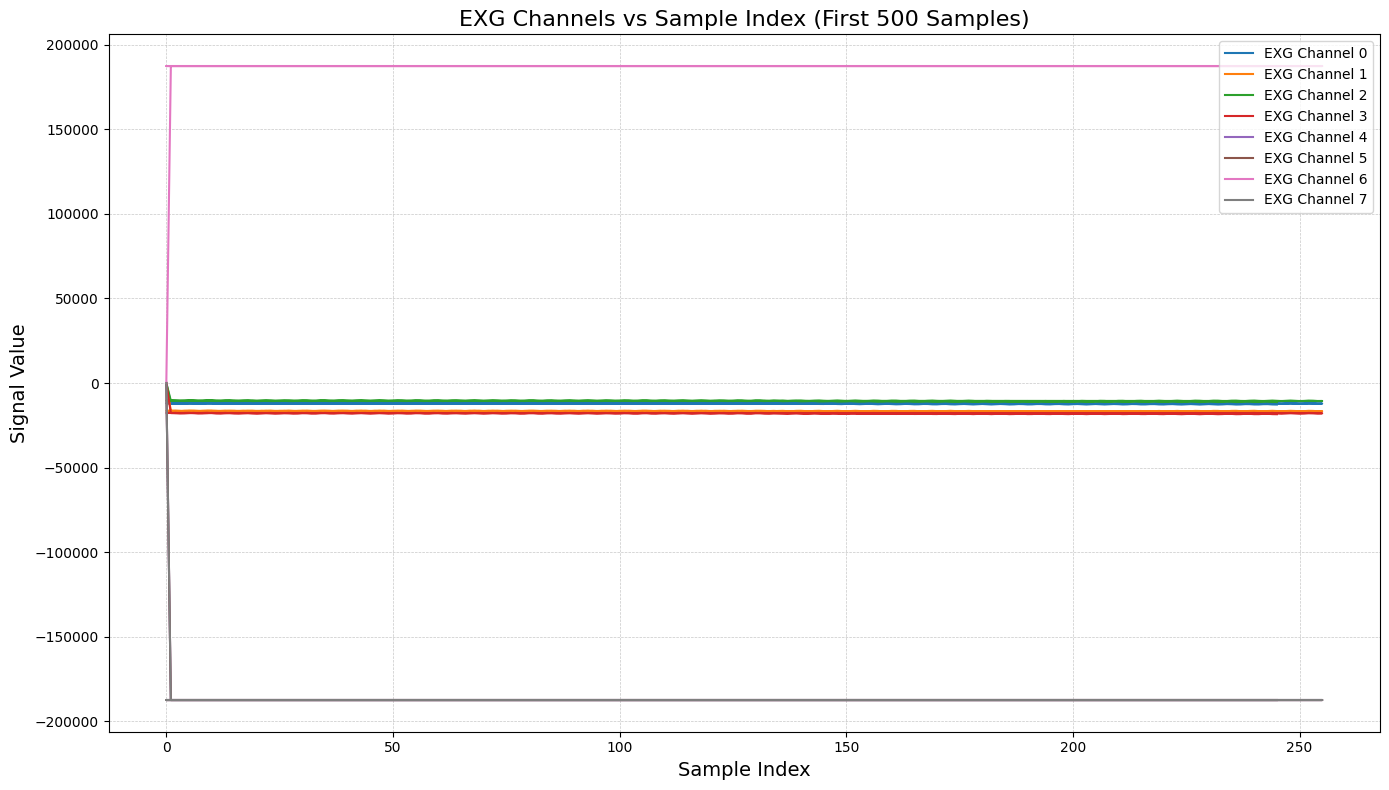

In [3]:
# Define the portion of data to plot
sample_limit = 500  # Plot only the first 500 sample indices
subset_data = data[:sample_limit]

# Plot settings
plt.figure(figsize=(14, 8))

# Plot each EXG Channel
for channel in [col for col in subset_data.columns if "EXG Channel" in col]:
    plt.plot(subset_data['Sample Index'], subset_data[channel], label=channel, linewidth=1.5)

# Customization
plt.title('EXG Channels vs Sample Index (First 500 Samples)', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Signal Value', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
